## Quickly create a CVC sequence and synthesise with neutral targets

This is meant to demonstrate a quick way to get a target sequence and synthesise it, with the aim of manually inspecting different targets...

In [1]:
import pandas as pd

from evoclearn.core import io
from evoclearn.core import samplers
from evoclearn.core import mappings
from evoclearn.core import vocaltractlab as vtl

In [2]:
#Load speaker bounds file and get neutral parameters from there:
bounds = io.load_bounds(open("../etc/JD2_bounds.json"))
params = list(bounds)
neutral_targets = [bounds[p]["default"] for p in params]

#Create a default target sequence with 3 targets: "C_onset", "V", "C_coda"
seq = io.default_sequence_from_bounds(bounds, labels=["C_onset", "V", "C_coda"])

#Load or specify durations for the three segments, and synthesise from targets:
cv_durs = io.read_durations_from_textgrid("data/bad.TextGrid", tier="1")[:3]
vtl.initialise("../etc/JD2_speaker.xml")
wav = mappings.synthesise_vtl_curves(mappings.vtl_curves_from_targets(seq, cv_durs))


In [3]:
from IPython.display import display, HTML
display(HTML(seq.to_html()))

,,HX,HY,JX,JA,LP,LD,VS,VO,TCX,TCY,TTX,TTY,TBX,TBY,TRX,TRY,TS1,TS2,TS3,vt_tau_s,_F0,_SP,_LD,_UD,_CA,_PL,_RA,_DP,_PS,_FL,_AS,gl_tau_s
idx,lab,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,C_onset,1.0,-4.75,0.0,-2.0,-0.07,0.95,0.0,-0.1,-0.4,-1.46,3.5,-1.0,2.0,0.5,0.0,0.0,0.0,0.0,0.0,0.015,120.0,8000.0,0.03,0.03,0.0,0.88,1.0,0.0,0.0,25.0,-40.0,0.015
1,V,1.0,-4.75,0.0,-2.0,-0.07,0.95,0.0,-0.1,-0.4,-1.46,3.5,-1.0,2.0,0.5,0.0,0.0,0.0,0.0,0.0,0.015,120.0,8000.0,0.03,0.03,0.0,0.88,1.0,0.0,0.0,25.0,-40.0,0.015
2,C_coda,1.0,-4.75,0.0,-2.0,-0.07,0.95,0.0,-0.1,-0.4,-1.46,3.5,-1.0,2.0,0.5,0.0,0.0,0.0,0.0,0.0,0.015,120.0,8000.0,0.03,0.03,0.0,0.88,1.0,0.0,0.0,25.0,-40.0,0.015


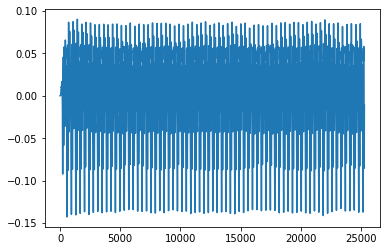

In [4]:
import matplotlib.pyplot as pl
pl.plot(wav)

In [5]:
#If you wanted to specify different static values for each segment before
#synthesis you could overwrite for example the "C_onset" parameters instead of
#all by indexing like this:
idx = pd.IndexSlice[:, "C_onset"]
seq.loc[idx, params] = neutral_targets #or others...
#etc...